In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
kolom_missing_value = data.columns[data.isnull().any()]

In [5]:
data[kolom_missing_value].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [6]:
data = data.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis=1)

In [7]:
data.shape

(1460, 74)

In [8]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [9]:
data['SaleCondition'].value_counts().reset_index()

,SaleCondition,count
0,Normal,1198
1,Partial,125
2,Abnorml,101
3,Family,20
4,Alloca,12
5,AdjLand,4


## Scatter Plot

In [4]:
#new feature sale condition
data['isRL']=0
for i in range(len(data['MSZoning'])):
    if data['MSZoning'][i] == 'RL':
        data['isRL'][i] = 'RL'
    else:
        data['isRL'][i] = 'NotRL'

C:\Users\ramad\AppData\Local\Temp\ipykernel_21232\3696870563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['isRL'][i] = 'RL'
C:\Users\ramad\AppData\Local\Temp\ipykernel_21232\3696870563.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'RL' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['isRL'][i] = 'RL'


In [11]:
data['isRL'].value_counts().reset_index()

,isRL,count
0,RL,1151
1,NotRL,309


<Axes: xlabel='LotArea', ylabel='SalePrice'>

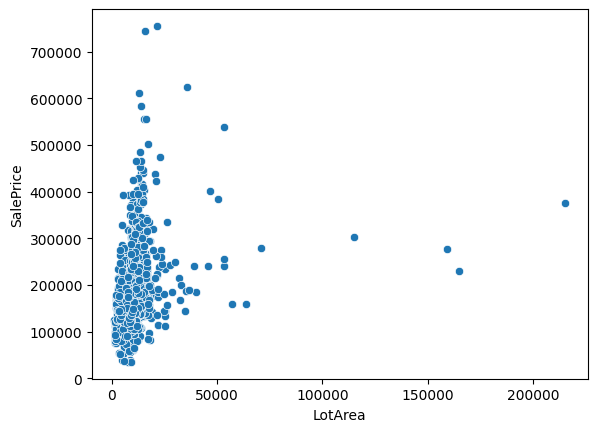

In [12]:
# Scatter Plot polos
sns.scatterplot(x=data['LotArea'],y=data['SalePrice'])

Text(0, 0.5, 'Sale Price')

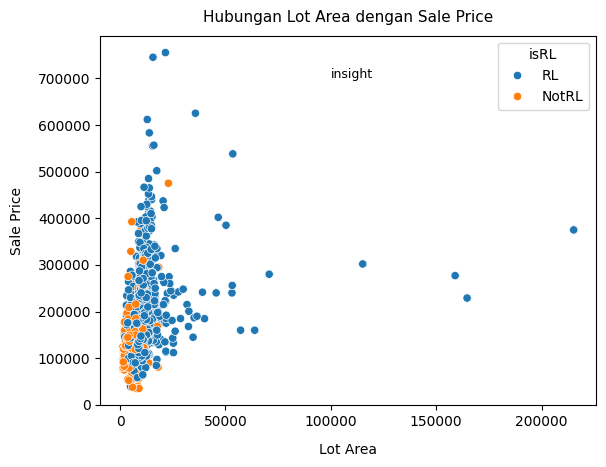

In [13]:
# Scatter Plot tambahan
sns.scatterplot(x=data['LotArea'],y=data['SalePrice'],hue=data['isRL'])
plt.title('Hubungan Lot Area dengan Sale Price',
          fontsize=11,
          pad = 10,
          loc = 'center' )

plt.text(x = 100000, y=700000,
         s = """insight""",
        fontsize = 9)

plt.xlabel("Lot Area", labelpad=10)
plt.ylabel("Sale Price", labelpad=10)

## Pie Chart

In [5]:
isRL = data['isRL'].value_counts()
isRL

isRL
RL       1151
NotRL     309
Name: count, dtype: int64

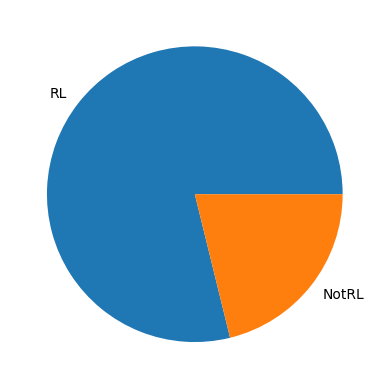

In [6]:
#Pie Chart Polos
isRL_value = isRL.values
isRL_label = isRL.index

plt.pie(isRL_value, labels=isRL_label)
plt.show()

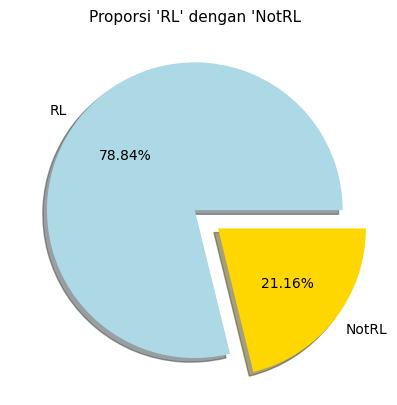

In [10]:
#Pie Chart tambahan
colors= ['lightblue','gold']
explode = (0,0.2)
plt.pie(isRL_value, labels=isRL_label,
        shadow=True, colors=colors, 
        explode = explode, # hatch=['**O', 'oO'],
        autopct='%1.2f%%')
plt.title("Proporsi 'RL' dengan 'NotRL",
          fontsize = 11,
          pad=3)
plt.show()